<a href="https://colab.research.google.com/github/TwoTapz/GroupProjectData/blob/main/GroupProject_2C2M.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1) EXTRACT


In [1]:
import requests
from bs4 import BeautifulSoup
import csv

# Base URL for the product pages
base_url = 'https://www.bestbuy.com/site/searchpage.jsp?_dyncharset=UTF-8&browsedCategory=pcmcat1587395108347&id=pcat17071&iht=n&ks=960&list=y&sc=Global&st=pcmcat1587395108347_categoryid%24pcmcat1487698928729&type=page&usc=All%20Categories&intl=nosplash'

# Headers to simulate a real browser request
headers = {
    'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/51.0.2704.103 Safari/537.36',
    'Accept-Language': 'en-US,en;q=0.9',
    'Accept-Encoding': 'gzip, deflate, br',
    'Connection': 'keep-alive',
    'Upgrade-Insecure-Requests': '1',
    'DNT': '1',
}

# Create a session to maintain cookies
session = requests.Session()

# Set a cookie for the U.S. region explicitly
session.cookies.set('bestbuy_region', 'US')

# File to save the scraped data
output_file = 'raw_data.csv'

# Prepare CSV file for writing
with open(output_file, mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    # Write the header row
    writer.writerow(['Page', 'Name', 'Price', 'Publisher', 'SKU', 'Release Date', 'Platform', 'ESRB Rating', 'Star Rating', 'Reviews'])

    print("Session and cookies initialized. Attempting to scrape BestBuy...")

    try:
        # Loop through pages 2 to 29
        for page in range(2, 30):
            # Add the page number to the URL
            url = f"{base_url}&cp={page}"
            print(f"Sending GET request to: {url}")
            r = session.get(url, headers=headers)

            # Check if the request is successful
            if r.status_code != 200:
                print(f"Error: Received status code {r.status_code} on page {page}. Skipping...")
                continue

            print(f"Received response for page {page} with status code: {r.status_code}")

            soup = BeautifulSoup(r.content, 'lxml')
            print(f"Parsed HTML content for page {page} successfully.")

            # Check if we are still on the country selection page
            if "Choose a country" in soup.get_text():
                print(f"We are still on the country selection page for page {page}. Exiting...")
                break

            # Find product list
            productlist = soup.find_all('li', class_="sku-item")

            if not productlist:
                print(f"No products found on page {page}. Check the selector or page content.")
                continue
            else:
                print(f"Found {len(productlist)} products on page {page}.")

            # Loop through products on the current page
            for i, product in enumerate(productlist, 1):

                # Extract product name
                name = product.find('h4', class_='sku-title').text.strip() if product.find('h4', class_='sku-title') else "N/A"

                # Extract product price
                price_container = product.find('div', class_='priceView-customer-price')
                price = price_container.find('span').text.strip() if price_container and price_container.find('span') else "N/A"

                # Extract product publisher
                publisher = product.find('span', text='Publisher:').find_next_sibling('span').text.strip() if product.find('span', text='Publisher:') else "N/A"
                # Extract product SKU value
                sku_value = product.find('span', text='SKU:').find_next_sibling('span').text.strip() if product.find('span', text='SKU:') else "N/A"
                # Extract release date
                release_date = product.find('span', text='Release Date:').find_next_sibling('span').text.strip() if product.find('span', text='Release Date:') else "N/A"
                # Extract platform
                platform_raw = product.find('div', class_='hover-name')
                platform = platform_raw.text.strip() if platform_raw else "N/A"

                # Extract ESRB rating
                esrb_rating_elements = product.find_all('a', href=lambda href: href and 'esrb.org' in href)
                esrb_rating = "N/A"
                for element in esrb_rating_elements:
                    esrb_rating = element.text.strip()

                # Extract star rating
                star_container = product.find('p', class_='visually-hidden')
                star_rating = "N/A"
                if star_container:
                    star_text = star_container.get_text(strip=True)
                    if "Rating" in star_text and "out of 5 stars" in star_text:
                        star_rating = star_text.split(" ")[1]

                # Extract number of reviews
                reviews_container = product.find('span', class_='c-reviews')
                reviews = "N/A"
                if reviews_container:
                    reviews_raw = reviews_container.text.strip()  # Raw text
                    reviews_cleaned = ''.join(filter(str.isdigit, reviews_raw))  # Keep only digits
                    reviews = int(reviews_cleaned) if reviews_cleaned else "N/A"

                # Debugging: Print extracted data
                print(f"Page: {page}, Name: {name}, Price: {price}, Publisher: {publisher}, SKU: {sku_value}, Release Date: {release_date}, Platform: {platform}, ESRB: {esrb_rating}, Stars: {star_rating}, Reviews: {reviews}")

                # Write data to CSV file
                writer.writerow([page, name, price, publisher, sku_value, release_date, platform, esrb_rating, star_rating, reviews])

    except requests.exceptions.RequestException as e:
        print(f"Request failed: {e}")
    except Exception as e:
        print(f"An error occurred: {e}")

print(f"Data successfully exported to {output_file}")


Session and cookies initialized. Attempting to scrape BestBuy...
Sending GET request to: https://www.bestbuy.com/site/searchpage.jsp?_dyncharset=UTF-8&browsedCategory=pcmcat1587395108347&id=pcat17071&iht=n&ks=960&list=y&sc=Global&st=pcmcat1587395108347_categoryid%24pcmcat1487698928729&type=page&usc=All%20Categories&intl=nosplash&cp=2
Received response for page 2 with status code: 200
Parsed HTML content for page 2 successfully.
Found 20 products on page 2.
Page: 2, Name: Dragon Age: The Veilguard Deluxe - PlayStation 5, Price: $89.99, Publisher: Electronic Arts, SKU: 6595736, Release Date: 10/31/2024, Platform: N/A, ESRB: M (Mature 17+), Stars: 4.2, Reviews: 28
Page: 2, Name: TMNT Arcade: Wrath of the Mutants - PlayStation 5, Price: $29.99, Publisher: GameMill Entertainment, SKU: 6577899, Release Date: 04/23/2024, Platform: N/A, ESRB: E10+ (Everyone 10+), Stars: 4.3, Reviews: 19
Page: 2, Name: The Plucky Squire - PlayStation 5, Price: $34.99, Publisher: Devolver Digital, SKU: 6599104, 

<ipython-input-1-c181ecf17a66>:78: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  publisher = product.find('span', text='Publisher:').find_next_sibling('span').text.strip() if product.find('span', text='Publisher:') else "N/A"
<ipython-input-1-c181ecf17a66>:80: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  sku_value = product.find('span', text='SKU:').find_next_sibling('span').text.strip() if product.find('span', text='SKU:') else "N/A"
<ipython-input-1-c181ecf17a66>:82: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  release_date = product.find('span', text='Release Date:').find_next_sibling('span').text.strip() if product.find('span', text='Release Date:') else "N/A"


Page: 2, Name: LEGO Star Wars: The Skywalker Saga Standard Edition - PlayStation 5, Price: $29.99, Publisher: WB Games, SKU: 6428346, Release Date: 04/05/2022, Platform: PlayStation 5, ESRB: E10+ (Everyone 10+), Stars: 4.8, Reviews: 375
Page: 2, Name: NBA 2K25 Standard Edition - PlayStation 5, Price: $29.99, Publisher: 2K, SKU: 6589464, Release Date: 09/04/2024, Platform: PlayStation 5, ESRB: E (Everyone), Stars: 4.7, Reviews: 202
Page: 2, Name: Five Nights at Freddy's: Help Wanted 2 - PlayStation 5, Price: $39.99, Publisher: Maximum Games, SKU: 6577573, Release Date: 06/20/2024, Platform: N/A, ESRB: T (Teen 13+), Stars: 4.5, Reviews: 8
Page: 2, Name: Unicorn Overlord - PlayStation 5, Price: $29.99, Publisher: SEGA, SKU: 6561944, Release Date: 03/08/2024, Platform: N/A, ESRB: T (Teen 13+), Stars: 4.9, Reviews: 69
Page: 2, Name: Call of Duty: Modern Warfare III with C.O.D.E Bonus Standard Edition - PlayStation 5, Price: $69.99, Publisher: Activision Blizzard, SKU: 6594297, Release Date:

Data attributes scraped:
1. Name
2. Price
3. Publisher
4. SKU
5. Release Date
6. Platform
7. ESRB Rating
8. Star Rating
9. Reviews


2) TRANSFORM


In [2]:
import pandas as pd

# Path to the uploaded raw data file
raw_data_path = 'raw_data.csv'
cleaned_csv_path = 'cleaned_data.csv'

# Load raw data without modifying it
raw_data = pd.read_csv(raw_data_path)

# Perform cleaning operations on a copy of the raw data
cleaned_data = raw_data.dropna(subset=['ESRB Rating', 'Star Rating', 'Reviews']).copy()
cleaned_data['Star Rating'] = pd.to_numeric(cleaned_data['Star Rating'], errors='coerce')
cleaned_data['Reviews'] = pd.to_numeric(cleaned_data['Reviews'], errors='coerce')
cleaned_data.dropna(subset=['Reviews'], inplace=True)
cleaned_data['Reviews'] = cleaned_data['Reviews'].round(0).astype(int)
cleaned_data.drop_duplicates(subset=['Name'], keep='first', inplace=True)
cleaned_data['Name'] = cleaned_data['Name'].replace(r"( - PlayStation 5| - PlayStation 4|PlayStation 5|PlayStation 4)", "", regex=True).str.strip()
cleaned_data['Price'] = cleaned_data['Price'].replace(r'[^\d.]', '', regex=True).astype(float)

# Save cleaned data to cleaned_csv
cleaned_data.to_csv(cleaned_csv_path, index=False)

cleaned_csv_path


'cleaned_data.csv'

Data Processing:
1. Remove rows where any of the ESRB Rating, Star Rating, and Reviews columns contain missing values.
2. Convert Star Rating column to numeric format, coercing invalid values to NaN
3. Convert Reviews column to numeric format, coercing invalid values to NaN
4. Remove any data that does not have a valid number of Reviews.
5. Round the values in the Reviews column to the nearest integer and converts them to an integer type for consistency.
6. Removes duplicate entries based on the Name column while keeping the first occurence of each unique product name.
7. Standardized the Name column by removing specific strings such as "Playstation 5".
8. Remove unnecessary character in the price column and convert it from string to float.

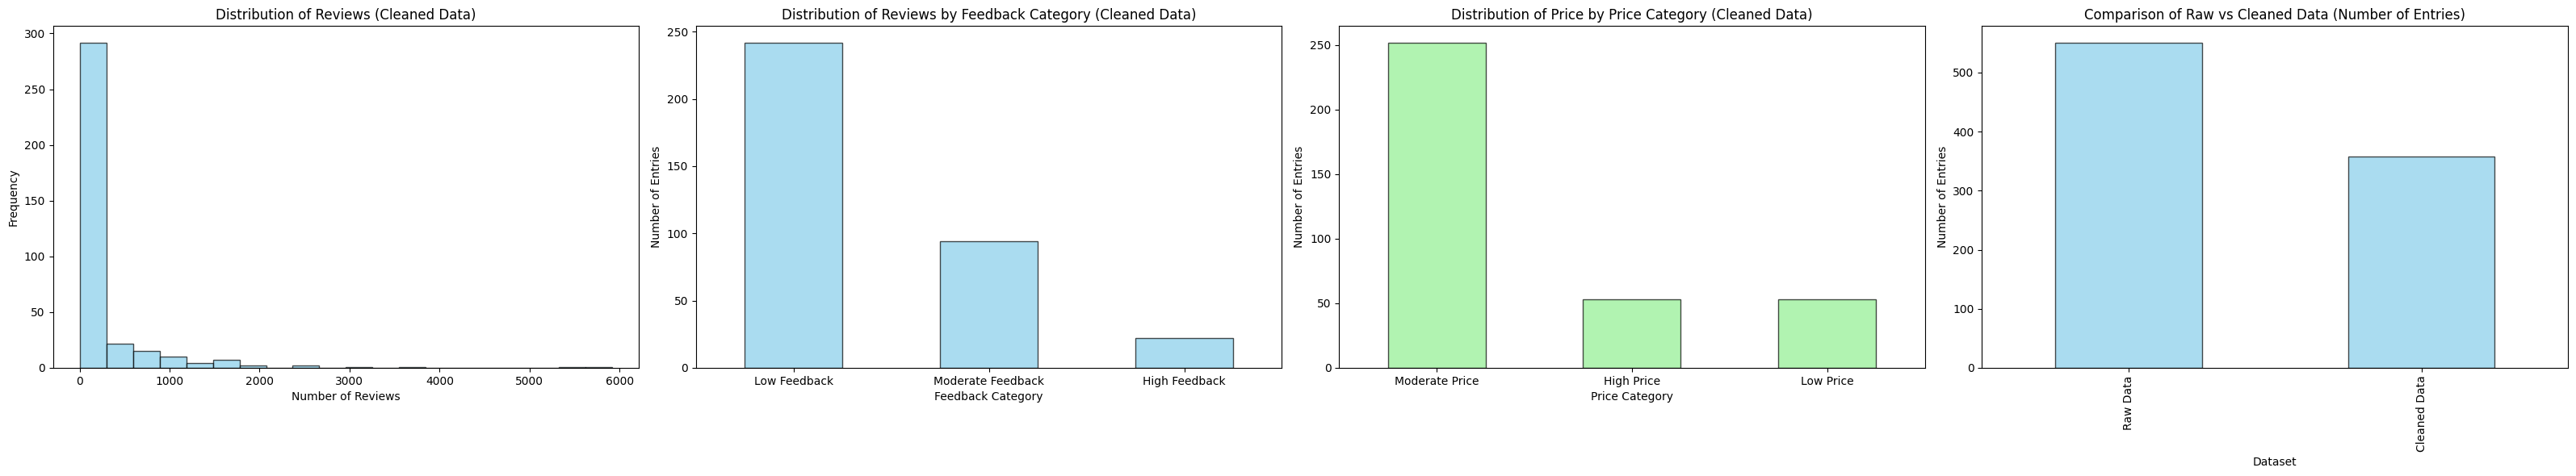

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the uploaded files
raw_csv_path = 'raw_data.csv'
cleaned_csv_path = 'cleaned_data.csv'

# Load raw data
raw_data = pd.read_csv(raw_csv_path)

# Load cleaned data
cleaned_data = pd.read_csv(cleaned_csv_path)

# Create a new column for feedback categories based on reviews
def categorize_reviews(reviews):
    if reviews >= 1000:
        return 'High Feedback'
    elif 100 <= reviews < 1000:
        return 'Moderate Feedback'
    else:
        return 'Low Feedback'

cleaned_data['Feedback Category'] = cleaned_data['Reviews'].apply(categorize_reviews)

# Create a new column for price categories
def categorize_price(price):
    if price >= 60:
        return 'High Price'
    elif 20 <= price < 60:
        return 'Moderate Price'
    else:
        return 'Low Price'

cleaned_data['Price Category'] = cleaned_data['Price'].apply(categorize_price)

# Save the processed cleaned data for further reference
processed_csv_path = 'transformed_cleaned_data.csv'
cleaned_data.to_csv(processed_csv_path, index=False)

# Data Visualization
fig, axes = plt.subplots(1, 4, figsize=(32, 6))

# Visualization 1: Distribution of reviews from cleaned data
cleaned_data['Reviews'].hist(bins=20, alpha=0.7, edgecolor='black', color='skyblue', ax=axes[0])
axes[0].set_title('Distribution of Reviews (Cleaned Data)')
axes[0].set_xlabel('Number of Reviews')
axes[0].set_ylabel('Frequency')
axes[0].grid(False)

# Visualization 2: Distribution of reviews by feedback category (Cleaned Data)
feedback_counts = cleaned_data['Feedback Category'].value_counts()
feedback_counts.plot(kind='bar', color='skyblue', edgecolor='black', alpha=0.7, ax=axes[1])
axes[1].set_title('Distribution of Reviews by Feedback Category (Cleaned Data)')
axes[1].set_xlabel('Feedback Category')
axes[1].set_ylabel('Number of Entries')
axes[1].tick_params(axis='x', rotation=0)

# Visualization 3: Distribution of price by price category (Cleaned Data)
price_counts = cleaned_data['Price Category'].value_counts()
price_counts.plot(kind='bar', color='lightgreen', edgecolor='black', alpha=0.7, ax=axes[2])
axes[2].set_title('Distribution of Price by Price Category (Cleaned Data)')
axes[2].set_xlabel('Price Category')
axes[2].set_ylabel('Number of Entries')
axes[2].tick_params(axis='x', rotation=0)

# Visualization 4: Comparison of raw vs cleaned data (Number of entries)
counts = pd.DataFrame({
    'Dataset': ['Raw Data', 'Cleaned Data'],
    'Number of Entries': [len(raw_data), len(cleaned_data)]
})
counts.plot(kind='bar', x='Dataset', y='Number of Entries', legend=False, color='skyblue', edgecolor='black', alpha=0.7, ax=axes[3])
axes[3].set_title('Comparison of Raw vs Cleaned Data (Number of Entries)')
axes[3].set_ylabel('Number of Entries')
axes[3].set_xlabel('Dataset')

# Show all charts side by side
plt.tight_layout()
plt.show()


First Diagram: The diagram shows the distribution of reviews after all the data processing has been done (duplicates has been removed).

Second Diagram: The diagram shows the distribution of reviews by feedback category for the cleaned data.

Third Diagram: The diagram provides a categorical overview of price ranges within the cleaned dataset. The prices are classified into three distinct categories:

High Price: Prices greater than or equal to 60.
Moderate Price: Prices ranging between 20 and 60.
Low Price: Prices below 20.

Fourth Diagram: The diagram shows the comparison of Raw vs Cleaned Data by comparing the number of entries for both data.